## Importing necessary modules and dataset

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset into a variable

In [2]:
data = load_breast_cancer()

## Exploring dataset

In [8]:
x = data.data
y = data.target

In [9]:
df = pd.DataFrame(x, columns=data.feature_names)
df.sample(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
95,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,0.7576,1.5090,4.554,87.87,0.006016,0.034820,0.042320,0.012690,0.02657,0.004411,24.22,31.59,156.10,1750.0,0.11900,0.35390,0.40980,0.15730,0.3689,0.08368
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.014460,0.014230,0.005297,0.01961,0.001700,19.18,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
232,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,0.2239,1.6470,1.489,15.46,0.004359,0.006813,0.003223,0.003419,0.01916,0.002534,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
76,13.53,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,0.4101,1.0140,2.652,32.65,0.013400,0.028390,0.011620,0.008239,0.02572,0.006164,14.08,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191
531,11.67,20.02,75.21,416.2,0.10160,0.09453,0.042000,0.021570,0.1859,0.06461,0.2067,0.8745,1.393,15.34,0.005251,0.017270,0.018400,0.005298,0.01449,0.002671,13.35,28.81,87.00,550.6,0.15500,0.29640,0.27580,0.08120,0.3206,0.08950
219,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.026440,0.026640,0.010780,0.01332,0.002256,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df2=pd.DataFrame(y,columns=['target'])
df2.sample(6)

,target
535,0
308,1
422,1
291,1
430,0
22,0


([<matplotlib.patches.Wedge at 0x1525739fd90>,
 [Text(-0.4286547583668386, 1.0130424957174637, '1'),
  Text(0.4286549676938969, -1.0130424071436221, '0')],
 [Text(-0.23381168638191194, 0.5525686340277074, '62.74%'),
  Text(0.23381180056030737, -0.5525685857147029, '37.26%')])

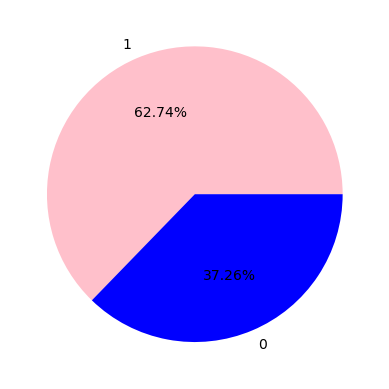

In [11]:
class_counts=df2["target"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=['pink', 'blue'])

## Splitting the Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Building and Training the model

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


## Making Predictions

In [14]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[1 0 0 1 1 0 0 0 1 1]


## Evaluating model accuracy

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.15%


In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 57   6]
 [  4 104]]


In [17]:
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

